In [157]:
#importing Libraries required

import nltk, re, pprint
from nltk import word_tokenize
from urllib import request
from nltk import sent_tokenize
from nltk.corpus import stopwords
import numpy as np
from nltk.corpus import gutenberg
from nltk.corpus import stopwords
from nltk.tokenize.treebank import TreebankWordDetokenizer
from nltk.stem.porter import PorterStemmer
from nltk.collocations import *

In [182]:
from sklearn.cluster import KMeans
wcss = [] # list of interia values at each "k" cluster trial (within cluster sum of squared errors, wcss)
n_clusters = list(range(2,8)) # finding optimal "k" clusters out of 10 possible clusters trials
for i in n_clusters:
    kmeans = KMeans(n_clusters=i,random_state=42,init='k-means++') # ‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence
    kmeans.fit(tfidf_matrix)
    wcss.append(kmeans.inertia_)
    print(kmeans.fit(tfidf_matrix)) # Silhouette analysis can be used to determine the degree of separation between clusters

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)
KMeans(algorithm='auto', copy_x=True, init='k

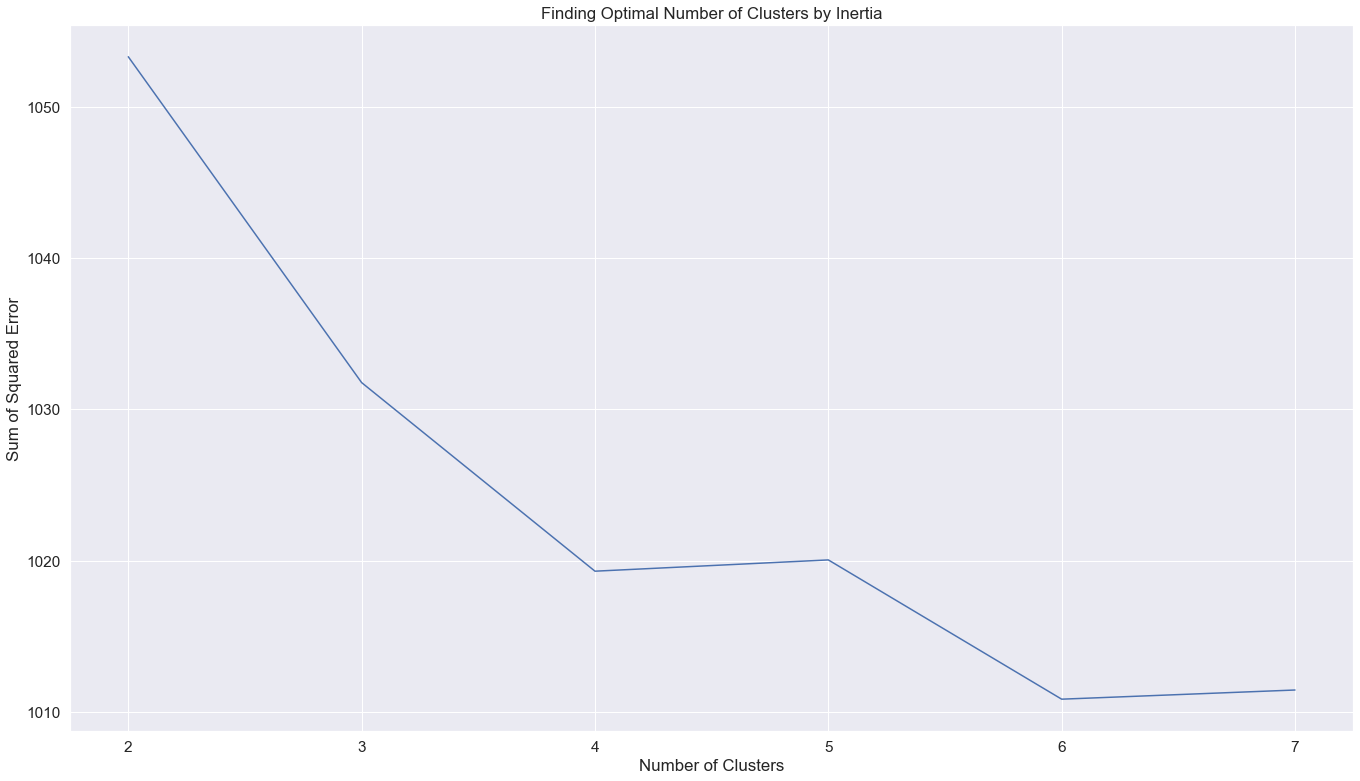

In [183]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (23,13)
plt.plot(n_clusters,wcss)
plt.title("Finding Optimal Number of Clusters by Inertia")
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squared Error")
plt.xticks(n_clusters)
plt.show()

In [184]:
from sklearn.metrics import classification_report
km = KMeans(n_clusters=5, verbose=0, random_state=20, init='k-means++')
km.fit(tfidf_matrix)
labels = km.labels_
centers = km.cluster_centers_
score = silhouette_score (tfidf_matrix, labels, metric='euclidean')
print("Silhoutte_score of k-means:",score)
from sklearn.metrics import cohen_kappa_score
kappa1 = cohen_kappa_score(Label,labels,weights='linear')
print("Kappa of k-means:",kappa1)
from sklearn.metrics.cluster import adjusted_rand_score
rand1=adjusted_rand_score(Label, labels)
confusion1=confusion_matrix(Label, labels)



Silhoutte_score of k-means: -0.002858101441596383
Kappa of k-means: -0.19840652934317915


Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.0939600549661363
For n_clusters = 3 The average silhouette_score is : 0.08232933860638941
For n_clusters = 4 The average silhouette_score is : 0.08018488837584631
For n_clusters = 5 The average silhouette_score is : 0.08114671443265958
For n_clusters = 6 The average silhouette_score is : 0.08420475915352743
For n_clusters = 7 The average silhouette_score is : 0.003612183061133213


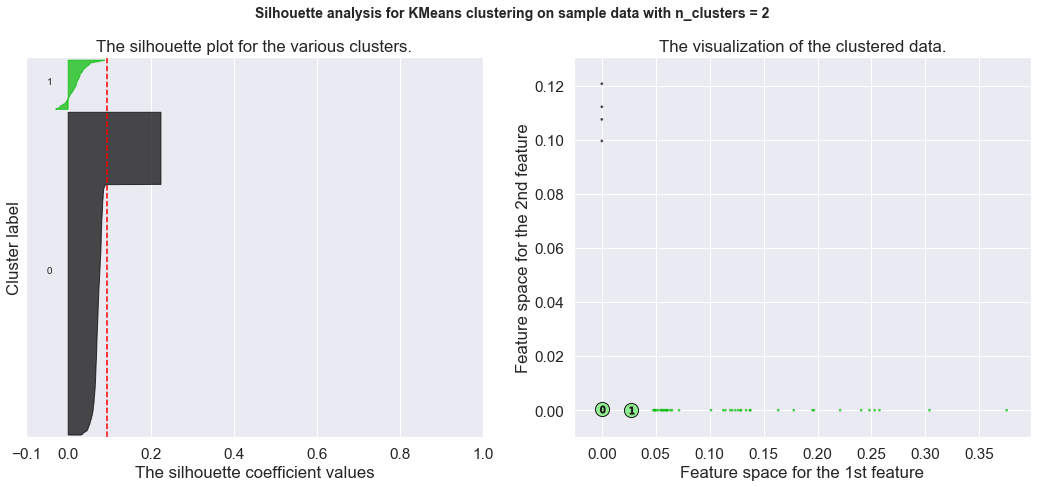

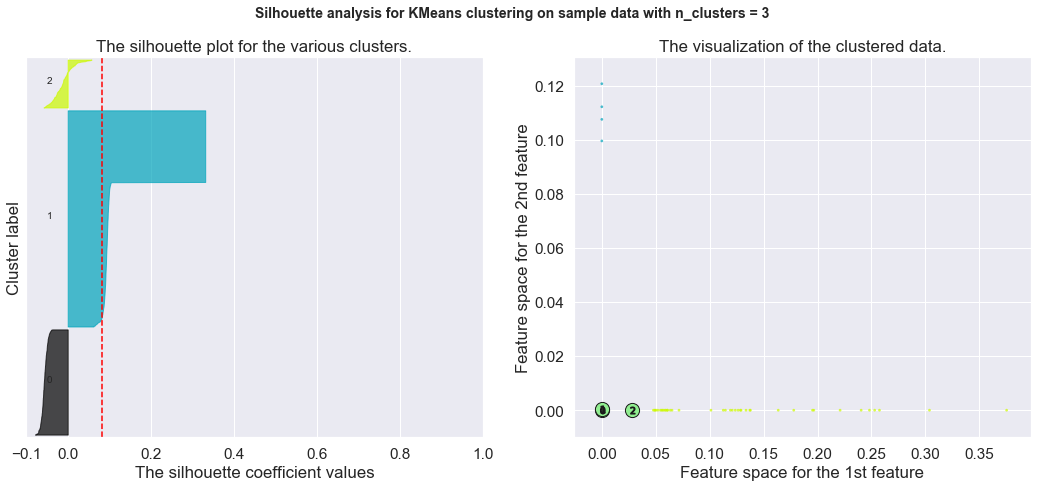

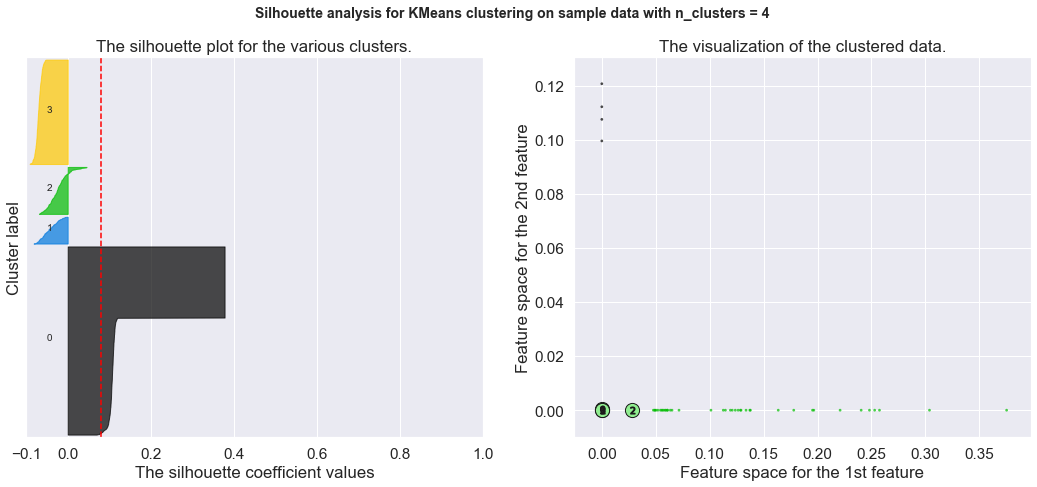

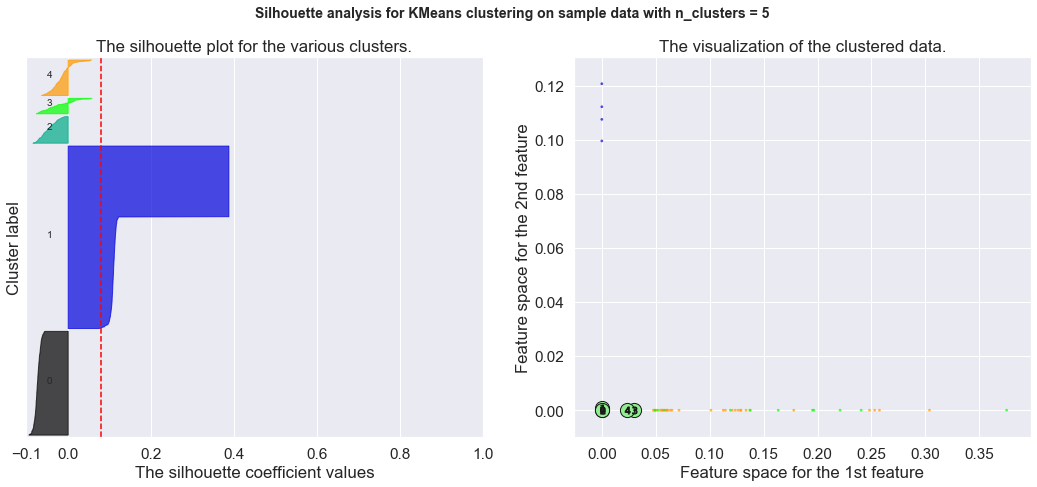

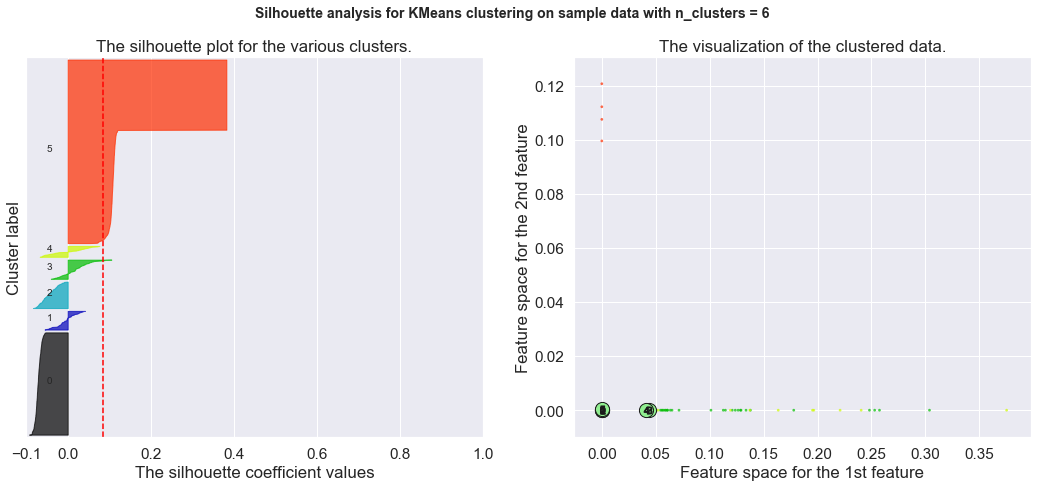

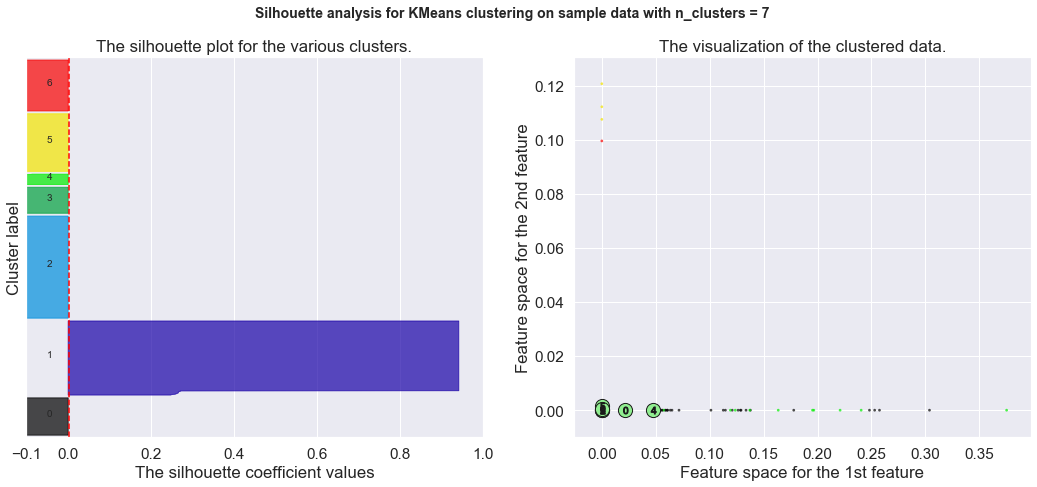

In [185]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.


range_n_clusters = [2, 3, 4, 5, 6, 7]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(tfidf_matrix) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(tfidf_matrix)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(tfidf_matrix, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(tfidf_matrix, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(tfidf_matrix[:, 0], tfidf_matrix[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="Lightgreen", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [186]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(affinity='euclidean', 
             linkage='average', memory=None, n_clusters=7)
clustering.fit(tfidf_matrix)
labels_AGG=clustering.labels_
#y_cluster_AGG = clustering.predict(tfidf_matrix)
score_AGG = silhouette_score (tfidf_matrix, labels_AGG, metric='euclidean')
print("Silhoutte_score of AgglomerativeClustering:",score_AGG)
kappa2=cohen_kappa_score(Label,labels_AGG,weights='linear')
print("Kappa of AgglomerativeClustering:",kappa2)
from sklearn.metrics.cluster import adjusted_rand_score
rand2=adjusted_rand_score(Label, labels_AGG)
confusion2=confusion_matrix(Label, labels_AGG)

Silhoutte_score of AgglomerativeClustering: 0.08669097693059219
Kappa of AgglomerativeClustering: -0.011050100610483726


In [187]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=7,random_state=10,n_init=1, max_iter=50).fit(tfidf_matrix)
labels_gmm=gmm.predict(tfidf_matrix)
score_gmm = silhouette_score (tfidf_matrix, labels_gmm, metric='euclidean')
print("Silhoutte_score of GaussianMixture:",score_gmm)
kappa3=cohen_kappa_score(Label,labels_gmm,weights='linear')
print("Kappa of GaussianMixture:",kappa3)
from sklearn.metrics.cluster import adjusted_rand_score
rand3=adjusted_rand_score(Label, labels_gmm)
confusion3=confusion_matrix(Label, labels_gmm)

Silhoutte_score of GaussianMixture: 0.06709954585893986
Kappa of GaussianMixture: -0.04082285227030491
